
# UNAD - Tarea 4: Clustering Jerárquico



## 1. Importación de Librerías y Configuración

In [1]:
# 🧰 Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Configuración moderna de visualización
sns.set_theme(style="whitegrid", palette="Set2")
plt.rcParams.update({
    'figure.figsize': (10, 6),
    'axes.grid': True,
    'grid.alpha': 0.3,
    'axes.spines.top': False,
    'axes.spines.right': False
})
sns.set_context("notebook", font_scale=1.1)

## 2. Carga y Preparación de Datos

In [2]:
# 📥 Cargar dataset
try:
    df = pd.read_csv("Mall_Customers.csv")
    print("✅ Dataset cargado exitosamente")
    display(df.head())
except FileNotFoundError:
    print("""
    ❌ ERROR: No se encuentra el archivo 'Mall_Customers.csv'
    Por favor:
    1. Asegúrate de que el archivo está en el mismo directorio que este notebook
    2. El nombre del archivo debe ser exactamente 'Mall_Customers.csv'
    3. Verifica los permisos de lectura del archivo
    """)
    raise

# Convertir género a variable numérica
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

✅ Dataset cargado exitosamente


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 3. Preprocesamiento de Datos

In [3]:
# 🎯 Seleccionar y escalar características
X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 4. Análisis de Clustering Jerárquico

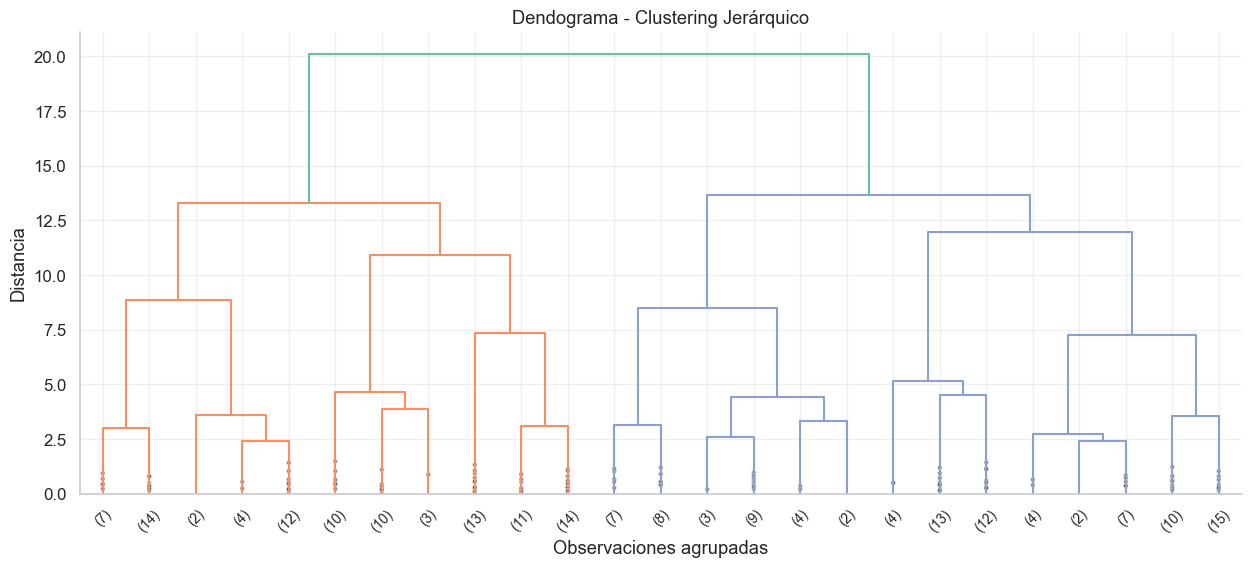

In [4]:
# 🌳 Crear matriz de enlaces y visualizar dendograma
Z = linkage(X_scaled, method='ward')

plt.figure(figsize=(15, 6))
dendrogram(Z, truncate_mode='lastp', p=25, leaf_rotation=45., 
          leaf_font_size=10., show_contracted=True)
plt.title("Dendograma - Clustering Jerárquico")
plt.xlabel("Observaciones agrupadas")
plt.ylabel("Distancia")
plt.grid(True)
plt.show()

## 5. Generación de Clusters

In [5]:
# ✂️ Definir clusters
n_clusters = 5
labels = fcluster(Z, n_clusters, criterion='maxclust')
df['Cluster_Hierarchical'] = labels

# 🧾 Evaluar resultados
silhouette = silhouette_score(X_scaled, labels)
calinski = calinski_harabasz_score(X_scaled, labels)
davies = davies_bouldin_score(X_scaled, labels)

print("\n✅ Métricas de evaluación:")
print(f"Silhouette Score: {silhouette:.3f}")
print(f"Calinski-Harabasz Score: {calinski:.3f}")
print(f"Davies-Bouldin Score: {davies:.3f}")


✅ Métricas de evaluación:
Silhouette Score: 0.287
Calinski-Harabasz Score: 64.469
Davies-Bouldin Score: 1.220


## 6. Visualización de Resultados

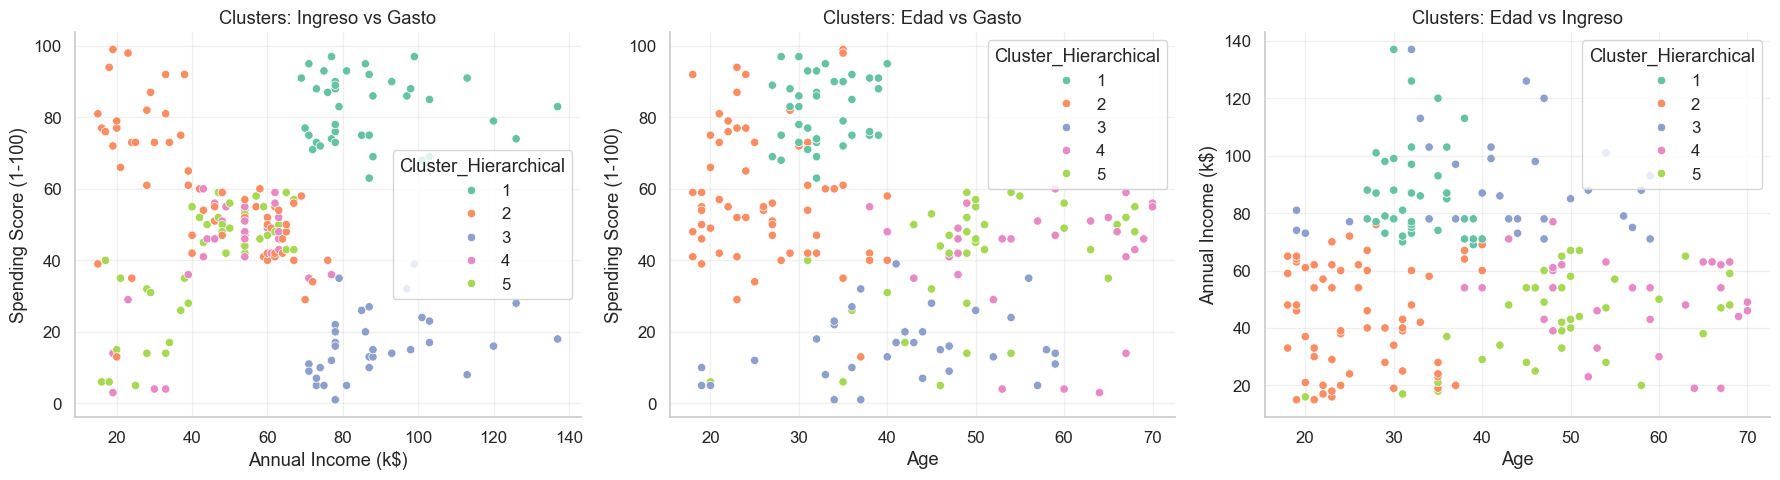


Estadísticas por cluster jerárquico:
                            Age            Annual Income (k$)             \
                           mean        std               mean        std   
Cluster_Hierarchical                                                       
1                     32.692308   3.728650          86.538462  16.312485   
2                     26.147541   6.284468          43.770492  18.202924   
3                     41.454545  11.172206          89.090909  16.451375   
4                     56.551724   9.682776          50.034483  14.739361   
5                     49.789474  10.570632          44.105263  15.300220   

                     Spending Score (1-100)               Gender            
                                       mean        std      mean       std  
Cluster_Hierarchical                                                        
1                                 82.128205   9.364489  0.538462  0.505035  
2                                 58.967213  

In [6]:
# 📊 Visualizar clusters
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='Cluster_Hierarchical', palette='Set2', ax=axs[0])
axs[0].set_title("Clusters: Ingreso vs Gasto")

sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', 
                hue='Cluster_Hierarchical', palette='Set2', ax=axs[1])
axs[1].set_title("Clusters: Edad vs Gasto")

sns.scatterplot(data=df, x='Age', y='Annual Income (k$)', 
                hue='Cluster_Hierarchical', palette='Set2', ax=axs[2])
axs[2].set_title("Clusters: Edad vs Ingreso")

plt.tight_layout()
plt.show()

# 📑 Estadísticas por cluster
print("\nEstadísticas por cluster jerárquico:")
print(df.groupby('Cluster_Hierarchical')[['Age', 'Annual Income (k$)', 
      'Spending Score (1-100)', 'Gender']].agg(['mean', 'std']))

## 📌 Interpretación de Resultados – Clustering Jerárquico

### ✅ Métricas de Evaluación

- **Silhouette Score**: `0.287`  
- **Calinski-Harabasz Score**: `64.469`  
- **Davies-Bouldin Score**: `1.220`

Estas métricas indican una segmentación funcional, aunque los clusters están algo menos definidos que en K-means.

---

### 📊 Análisis de los Clusters

#### 🔹 Cluster 1
Clientes jóvenes (~32 años), con **alto ingreso** (86.5k) y **alto gasto** (82.1).  
> 🟢 *Gran potencial comercial para estrategias premium.*

#### 🔹 Cluster 2
Clientes muy jóvenes (~26 años), ingreso medio (43.7k), gasto alto (58.9).  
> 🟡 *Buen público para promociones y fidelización.*

#### 🔹 Cluster 3
Hombres adultos (~41 años), ingreso alto (89k), gasto muy bajo (16.1).  
> 🔴 *Clientes con capacidad económica que no están comprando mucho. Se deben activar.*

#### 🔹 Cluster 4
Mayores (~56 años), ingreso medio (~50k), gasto medio (~41).  
> 🔵 *Segmento estable. Estrategias enfocadas en comodidad y fidelidad.*

#### 🔹 Cluster 5
Mujeres mayores (~49 años), ingreso medio-bajo (44.1k), gasto contenido (39.6).  
> 🟣 *Clientes racionales. Enfocar productos funcionales y servicios esenciales.*

---

### 🌳 Dendograma

El dendograma muestra la estructura jerárquica de los clusters. Se identificaron 5 grupos principales con base en la distancia de similitud. Esta visualización apoya la segmentación realizada y refuerza la interpretación de los datos.